# Digit Recogition

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Exploration & Visualization:

Data shape: (1797, 64)
Target shape: (1797,)


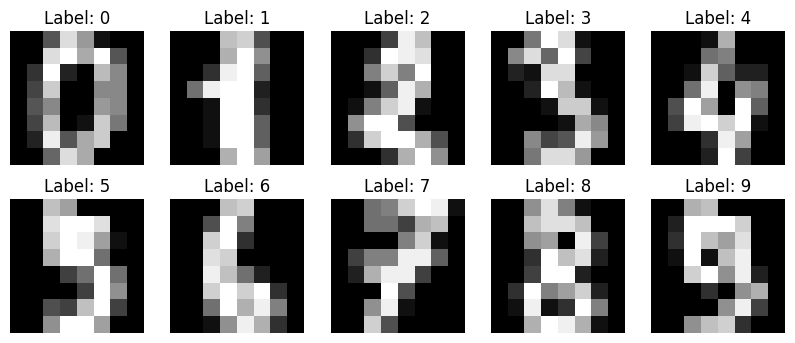

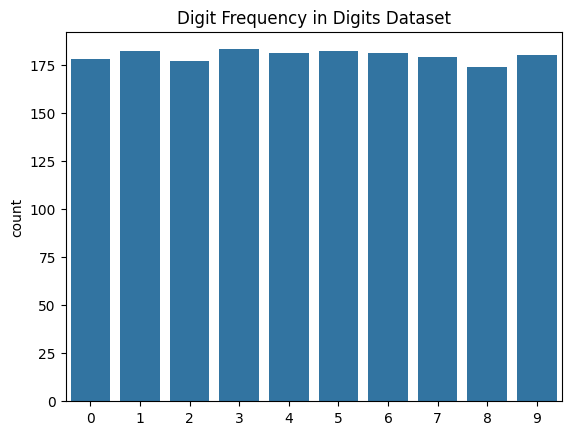

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print("Data shape:", X.shape)
print("Target shape:", y.shape)
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()
sns.countplot(x=y)
plt.title("Digit Frequency in Digits Dataset")
plt.show()

In [3]:
# Train-test split
from sklearn.model_selection import train_test_split
X = X / 16.0  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1437, 64)
Test shape: (360, 64)


In [4]:
# Model Training (Linear Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



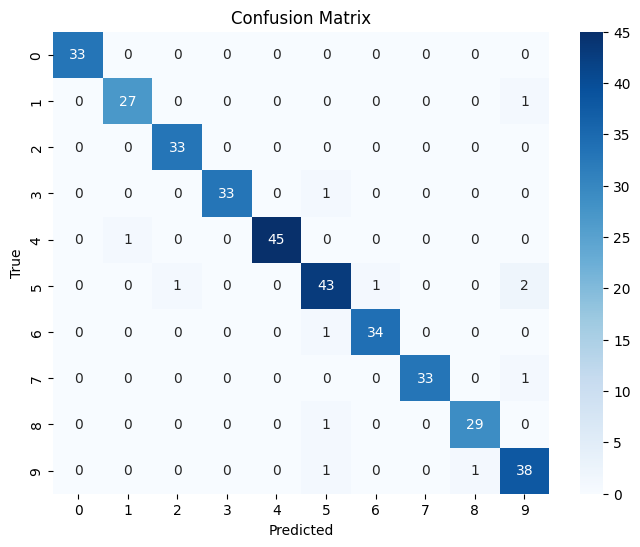

In [5]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Other Models:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM ": SVC(kernel="rbf", random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

KNN Accuracy: 0.9861
Decision Tree Accuracy: 0.8417
Random Forest Accuracy: 0.9722
SVM  Accuracy: 0.9861


# Confusion Matrix of other Models:

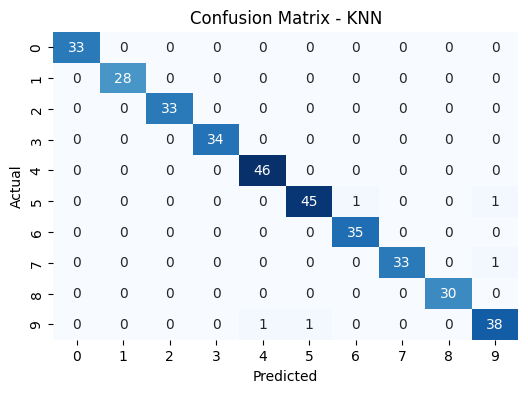

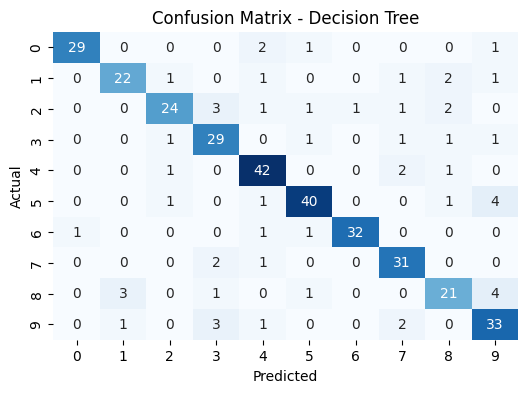

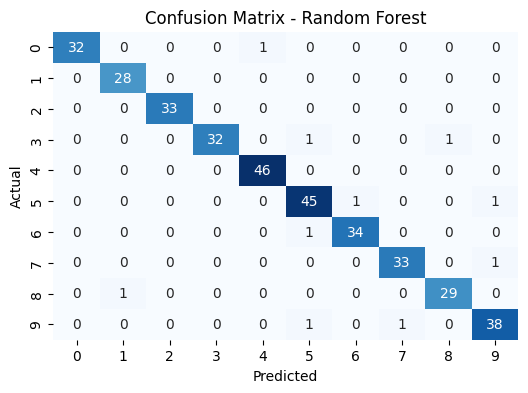

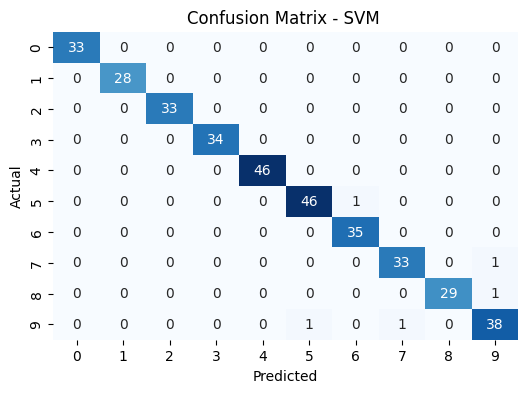

In [11]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():
    y_pred = model.predict(X_test) 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()